# **Data3406**

> Authur: Ran Sun

### **Does temperature affect people's willingness to walk?**



---
(This notebook is copied from the pre-processed dataset from tpp08-partcipant5.)




> *Importing libraries required for data cleanings and explorations below.*


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress   
import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from random import choice
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

> Reading modified data from a csv file.

In [2]:
M5=pd.read_csv('/content/drive/MyDrive/Modifydata/modifydata.csv')
M5.head() # Check the structure of dataset.
print(M5.dtypes)# Check type of variables.

Date     object
Count     int64
dtype: object


> Convert object type into datetime types


In [3]:
M5['Date'].replace('-','',regex=True,inplace=True) # replace some unwanted parts of character.
M5.head()
M5['Date'] = pd.to_datetime(M5['Date'], format='%Y%m%d')# convert it into normalized forms.
print(M5.dtypes)

Date     datetime64[ns]
Count             int64
dtype: object


In [4]:
M5.head()# Check modfied data

,Date,Count
0,2022-01-01,114
1,2022-01-02,8681
2,2022-01-03,5104
3,2022-01-04,8031
4,2022-01-05,7743


> Aggregate by weekly data

In [5]:
M5_clean=M5 
M5_clean=M5_clean.resample('W-Mon', on='Date').sum() # resample into week
M5_clean.head() # check the weekly step counts.

,Count
Date,
2022-01-03,13899
2022-01-10,27776
2022-01-17,0
2022-01-24,0
2022-01-31,4


> Extracting trend from weekly data

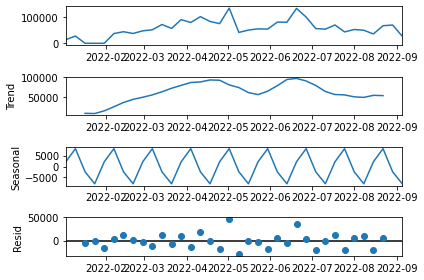

In [6]:
# Basic time series model: step count(t) = Level(t) + Trend(t) + Seasonality(t) + Noise(t), where t = any day
m4=M5_clean
m4['date']=m4.index
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(m4.drop(columns=['date']), model = 'additive',period=4)
fig = decomposition.plot()


(array([738156., 738187., 738215., 738246., 738276., 738307., 738337.,
        738368., 738399.]), <a list of 9 Text major ticklabel objects>)

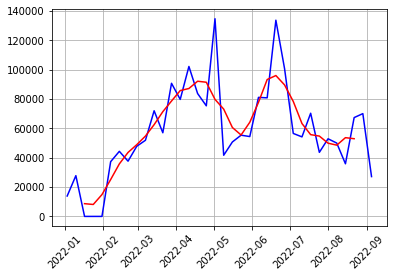

In [7]:
# plot trend on matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
plt.plot(m4.index, m4['Count'], c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')
plt.xticks(rotation=45)


#### **Visualization conclusions**

> `Trends`

*   From trend graph above, we could see there is an incaresing trend from week to week until May and July respectively.
















## **Overall conclusions**

We conclude that the trend of step count will start with an increasing tendency in date with lower temperature.According to the visualization above indicates March and April are autumn in Australia which would be a better preference for walking. Hence, peope would take less step counts in summer like January and more steps in autumn or winter, such as June.





---

### **Would rainfall be a factor to affect people's willingness to walk?**


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 10 Text major ticklabel objects>)

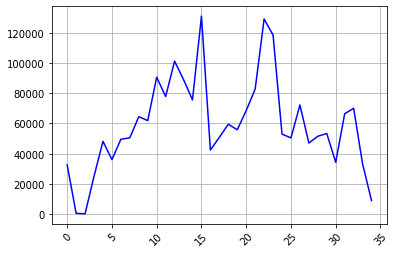

In [10]:
W7 = M5.groupby([M5['Date'].dt.isocalendar().week]).sum().rename_axis(['week']).reset_index()
W7['week']=W7.index
fig, ax = plt.subplots()
ax.grid(True)
plt.plot(W7.index, W7['Count'], c='blue')
plt.xticks(rotation=45)

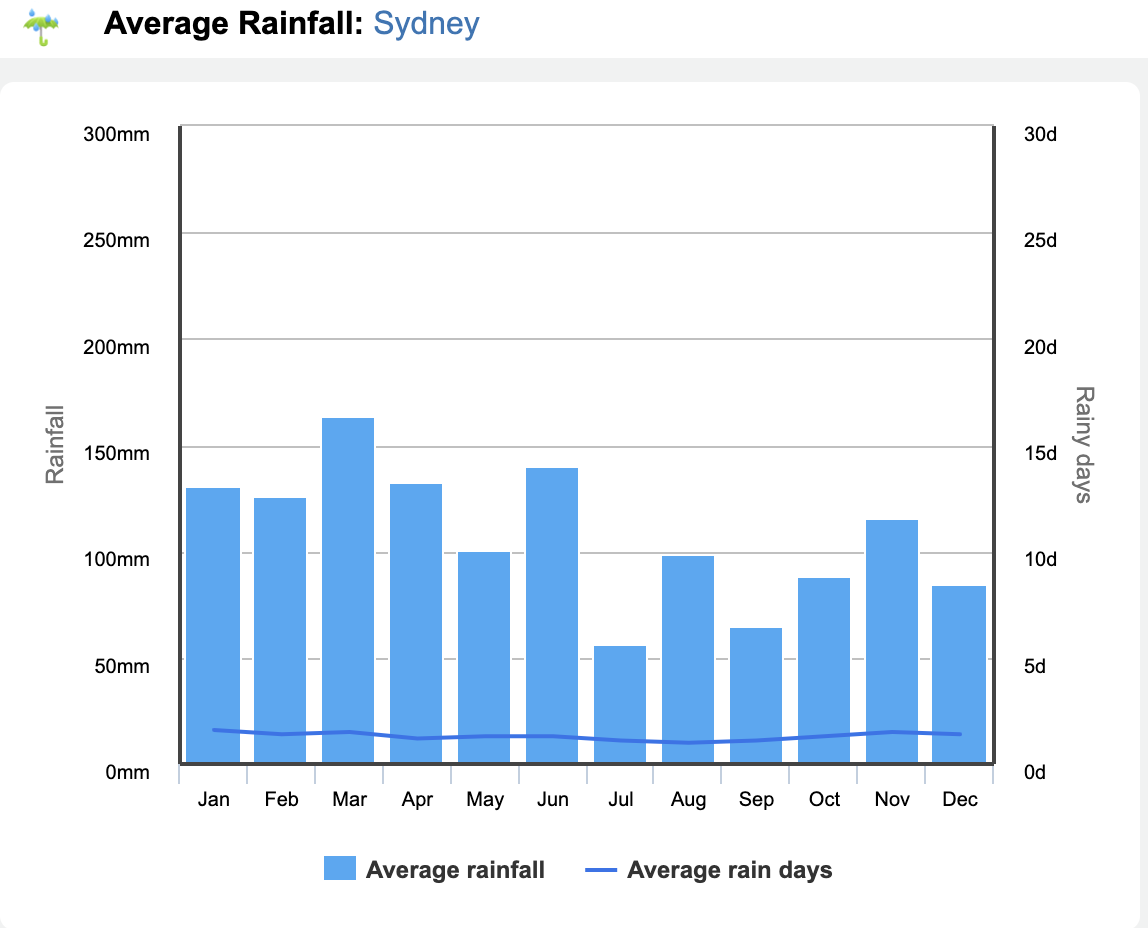

## **Overall Conclusion**

As the rainfall graph shows above, rainfall seems not to be a factor to influence the willingness of walk for this participant, cuz the date with highest amount of raindrop indicate pretty low steps according the trend.



---
## **How does week-to-week data illustrates the probability of participate getting healthy?**



In [57]:
weeksteps05=pd.read_csv('/content/drive/MyDrive/Modifydata/weeks_and_steps_5.csv')
weeksteps05['Week'] = weeksteps05['Week'].astype('int') # Change into int type
weeksteps05['sedentary'] = weeksteps05['sedentary'].astype('int')

In [58]:
x05 = weeksteps05.drop(columns='sedentary') # Independent
y05 = weeksteps05['sedentary'] # Dependent



```
Split train and test dataset in sample.
```



In [59]:
x05_train,x05_test,y05_train,y05_test = train_test_split(x05, y05, test_size = 0.5) # I selected 30% of data for testing. Temporarily do not set random sampling.



```
Replace them into regre4ssion and exexcute.
```



In [60]:
model05 = LogisticRegression()
model05 = model05.fit(x05_train, y05_train)
Y_prd05 = model05.predict(x05_test)
Y_prd05[:20] # Get the prediction of sedentary.

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [61]:
A = pd.DataFrame()
A['Predicted'] = list(Y_prd05)
A['Actual'] = list(y05_test)
A.head()

,Predicted,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0




```
Calculate the accuracy.
```



In [62]:
acc05 = model05.score(x05_test, y05_test)
acc05

0.8823529411764706

In [63]:
Y_prd_acc05 = model05.predict_proba(x05_test)
Acc_table05 = pd.DataFrame(Y_prd_acc05, columns = ['Probability of not sedentary','Probability of sedentary'])
Acc_table05.head()

,Probability of not sedentary,Probability of sedentary
0,0.746126,0.253874
1,0.850845,0.149155
2,0.714267,0.285733
3,0.793902,0.206098
4,0.952831,0.047169


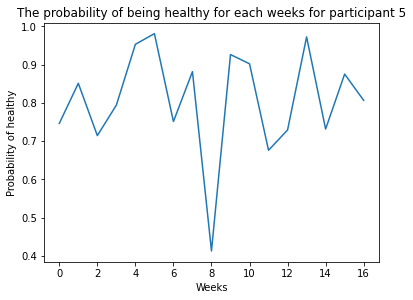

In [64]:
y05 = Acc_table05['Probability of not sedentary']
x05 = [  ]
for n in range(0,len(Acc_table05)):
  x05.append(n)
  n+=1
plt.plot(x05,y05)
plt.xlabel("Weeks")
plt.ylabel("Probability of healthy")
plt.title("The probability of being healthy for each weeks for participant 5")
plt.subplots_adjust(bottom=0.05)

## **Overall conclusions** 
This garph can be approximately frorecast the probability of being healthy, but not really consistent to trend graph that the more steps stand for more healthy, because it caused by some other factors instead.



---
## **Would people choose to walk based on season?**


In [70]:
M5.head()

,Date,Count
0,2022-01-01,114
1,2022-01-02,8681
2,2022-01-03,5104
3,2022-01-04,8031
4,2022-01-05,7743


In [71]:
weaksum = pd.DataFrame(M5.resample('W', on='Date')['Count'].sum()).reset_index()

In [74]:
gb_month = weaksum.groupby([weaksum['Date'].dt.isocalendar().week, weaksum['Date'].dt.month]).mean().rename_axis(['week', 'month']).reset_index()
gb_month.head()

,week,month,Count
0,1,1,32533.0
1,2,1,347.0
2,3,1,0.0
3,4,1,4.0
4,5,2,24943.0


In [76]:
season = gb_month.copy()
season['month'] = season['month'].replace([9,10,11], 'Spring')
season['month'] = season['month'].replace([12,1,2], 'Summer')
season['month'] = season['month'].replace([3,4,5], 'Fall')
season['month'] = season['month'].replace([6,7,8], 'Winter')
season.head()

,week,month,Count
0,1,Summer,32533.0
1,2,Summer,347.0
2,3,Summer,0.0
3,4,Summer,4.0
4,5,Summer,24943.0


In [86]:
season.rename({"Count":"sum of steps"}, axis = 1, inplace = True)
season.rename({"month":"season"}, axis = 1, inplace = True)
gb_season = season.groupby(['season','week']).mean() #We have grouped the averages of different seasons and weeks
gb_season.head()

sum of steps
season week              
Fall   9          50478.0
       10         64540.0
       11         61896.0
       12         90738.0
       13         77896.0

In [87]:
#Let the data of the corresponding season be stored in the corresponding variable name
spring = gb_season.iloc[gb_season.index.get_level_values('season') == 'Spring'].reset_index() 
summer = gb_season.iloc[gb_season.index.get_level_values('season') == 'Summer'].reset_index()
fall = gb_season.iloc[gb_season.index.get_level_values('season') == 'Fall'].reset_index()
winter = gb_season.iloc[gb_season.index.get_level_values('season') == 'Winter'].reset_index()

Text(0.5, 0.98, 'Average Steps during the weeks in Seasons')

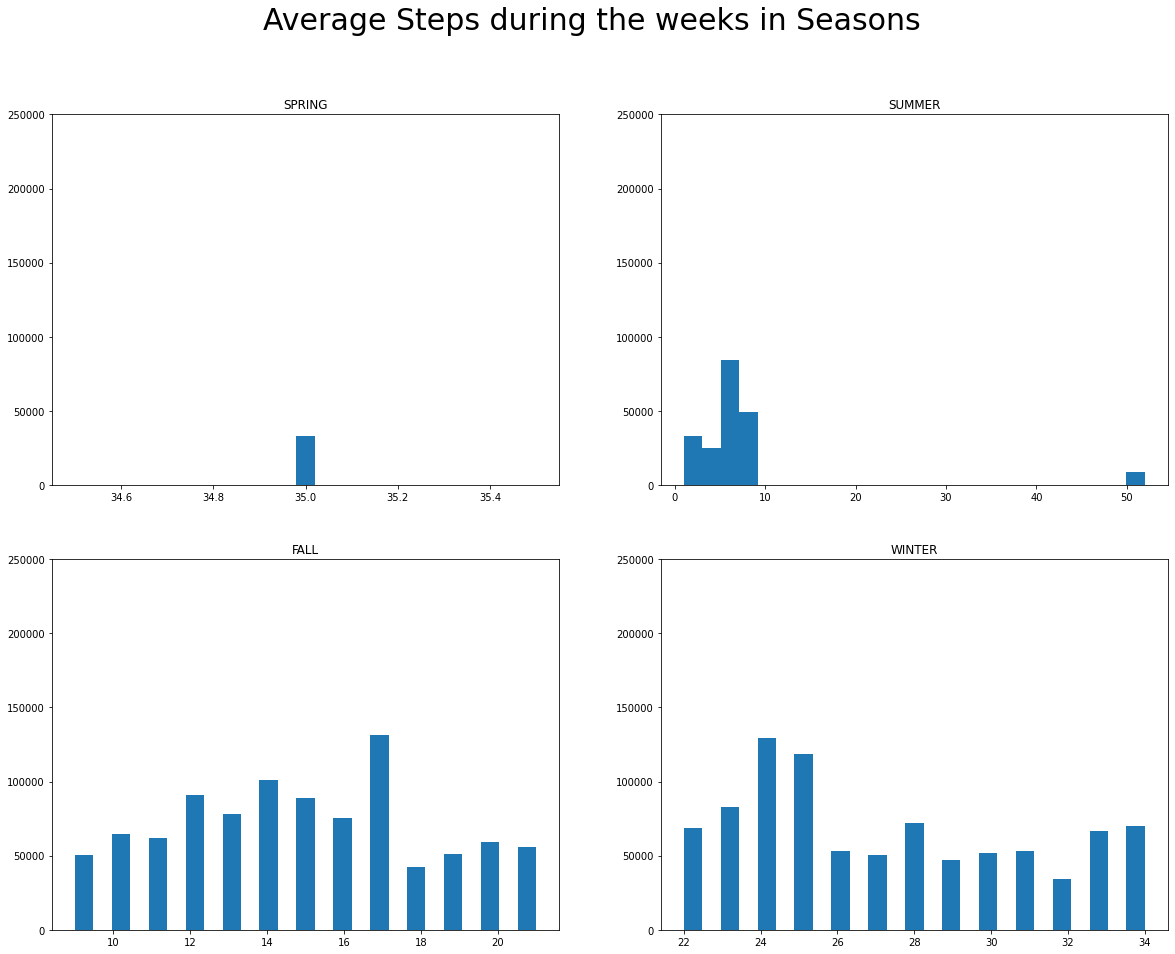

In [88]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15)) #set a 2x2 figure table to show the 4 different seasons

plt.subplot(2,2,1) # to be the first 1 (top left)
plt.hist(x = spring['week'], weights = spring['sum of steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 250000])
plt.title('SPRING')

plt.subplot(2,2,2) # to be the first 1 (top right)
plt.hist(x = summer['week'], weights = summer['sum of steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 250000])
plt.title('SUMMER')

plt.subplot(2,2,3) # to be the first 1 (bottom left)
plt.hist(x = fall['week'], weights = fall['sum of steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 250000])
plt.title('FALL')

plt.subplot(2,2,4) # to be the first 1 (bottom right)
plt.hist(x = winter['week'], weights = winter['sum of steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 250000])
plt.title('WINTER')

plt.suptitle('Average Steps during the weeks in Seasons', fontsize=30)

## **Overall conclusion**
Compared to season with high temperature, Fall and Winter are good time for people to walk more steps.



---
## **Are students less active during the exam week?**




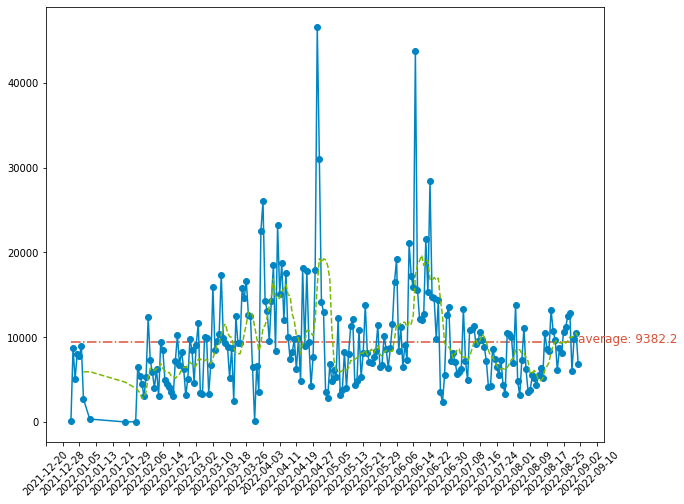

In [101]:
M5
x = M5.Date 
y = M5.Count # define the variable
color1 = '#0085c3'
color2 = '#7ab800'
color3 = '#dc5034' # define the color
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111) # set the size of the image
ax.plot(x, y, marker='o', color=color1) # draw the plot
y2 = y.rolling(7).mean() # calculate week trend
ax.plot(x, y2, ls='--', color=color2, label='week average') # draw trend
ax.hlines(y.mean(), x[0], x[-1:],
          linestyles='-.', colors=color3) # draw average
ax.text(x[-1:], y.mean()-2,
        'average: ' + str(round(y.mean(),1)),
        color=color3, fontsize=12) # indicate average
import matplotlib as mpl
xlocator = mpl.ticker.MultipleLocator(8)
ax.xaxis.set_major_locator(xlocator)
plt.xticks(rotation=45) # adjust x plot

plt.show() # highlight target data

## **Overall conclusion**
It is clear that participant5 tend to walk more on exam weeks. Maybe he/she decide to study outdoors rather than study at home.